In [1]:
from pathlib import Path
import pandas as pd
import data_processing as data
import analysis
import svg_utils

In [2]:
# define the SVGs files you want to modify
human_diagram = 'human_diagram.svg'

# input directories
svg_dir = Path('./data/svg')

# define output directory
figures_dir = Path('./figures')
figures_dir.mkdir(exist_ok=True)

SRP_fig = figures_dir / 'SRP_ER_translocation'
PG_PD_fig = figures_dir / 'PG_PD'
SRP_fig.mkdir(exist_ok=True)
PG_PD_fig.mkdir(exist_ok=True)

In [3]:
all_donors = data.get_dataset(dataset='adult')

srp_genes = pd.read_csv('./data/gene_lists/SRP_list.txt', header=None, names=['gene_symbol'])
srp_genes = srp_genes.loc[:, 'gene_symbol']
print(f'Number of SRP genes: {srp_genes.shape[0]}')

pg_pd_genes = pd.read_csv('./results/Supplement Table 4 -genewise_pg_pd_controls.descriptions.csv')
pg_pd_genes = pg_pd_genes[(pg_pd_genes['p.adjust'] <= 0.05) & (pg_pd_genes['signed_log_p'] > 0)].gene_symbol
print(f'Number of genes from from diff exp of Pg infected tissue: {pg_pd_genes.shape[0]}')

Processed HBA brain dataset found locally. Loading from data/processed_HBA/adult_brainarea_vs_genes_exp_default_donors_10021-9861-14380-15697-15496-12876.tsv
Number of SRP genes: 92
Number of genes from from diff exp of Pg infected tissue: 942


In [4]:
# create tables to match AUC values to structures
adult_lookup_srp = svg_utils.create_auc_lookup(exp_df=all_donors, gene_list=srp_genes, ontology='adult')
adult_lookup_pg_pd = svg_utils.create_auc_lookup(exp_df=all_donors, gene_list=pg_pd_genes, ontology='adult')

You submitted a gene list with 92 genes.
    90 of those genes are present in the reference dataset.
    Genes not found in our reference data: ['RPL41' 'RPL18A']
You submitted a gene list with 942 genes.
    933 of those genes are present in the reference dataset.
    Genes not found in our reference data: ['FKBP1C' 'PRG4' 'CBWD2' 'TVP23B' 'CBWD3' 'ZNF487' 'BLOC1S5-TXNDC5'
 'FPGT-TNNI3K' 'PPP5D1']


In [5]:
# modify the human diagram SVG based on enrichment scores for SRP and PG_PD genes
svg_utils.modify_svg(svg_dir / human_diagram, SRP_fig / human_diagram, graph_id='adult', lookup_table=adult_lookup_srp)
svg_utils.modify_svg(svg_dir / human_diagram, PG_PD_fig / human_diagram, graph_id='adult', lookup_table=adult_lookup_pg_pd)

Writing modified svg to figures/SRP_ER_translocation/human_diagram.svg
Writing modified svg to figures/PG_PD/human_diagram.svg


### Create cbar for each separate svg/set of genes

In [6]:
# graph_id == 'adult'
ontology = svg_utils.get_ontology(json_file='./data/ontology.json', atlas_id=265297125, graph_id=10)

In [7]:
svg_sIDs = svg_utils.get_sIDs_in_SVG(svg_dir / human_diagram, ontology)

In [14]:
sID_auc_map_srp = svg_utils.get_AUC_vals_for_sIDs(svg_sIDs.keys(), ontology, adult_lookup_srp)
sID_auc_map_pgpd = svg_utils.get_AUC_vals_for_sIDs(svg_sIDs.keys(), ontology, adult_lookup_pg_pd)

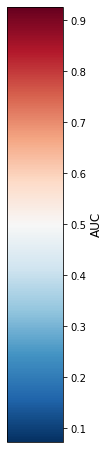

In [16]:
sID_hex_map_srp, cbar_srp = svg_utils.convert_AUCvals_to_hex(sID_auc_map_srp, generate_cbar=True)

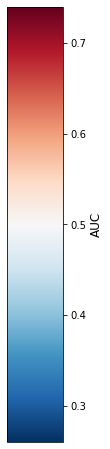

In [17]:
sID_hex_map_pg_pd, cbar_pg_pd = svg_utils.convert_AUCvals_to_hex(sID_auc_map_pgpd, generate_cbar=True)